[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
{'Rabi1': 0.1, 'Rabi2': 1, 'penalty': 5.0}
Step  0:  	(weight2 = 0.007237816400628547 = 0.004941953577707131 + 0.001084496872599119 + 0.0012113659503222975)
  [[ 0.00378681+0.j         0.00725318+0.7808259j  0.00725318+0.7808259j
     0.03657792+0.j       ]                                             
   [ 0.00725318-0.7808259j -0.00378681+0.j         0.03657792+0.j       
    -0.00725318+0.7808259j]                                             
   [ 0.00725318-0.7808259j  0.03657792+0.j        -0.00378681+0.j       
    -0.00725318+0.7808259j]                                             
   [ 0.03657792+0.j        -0.00725318-0.7808259j -0.00725318-0.7808259j
     0.00378681+0.j       ]]                                            
          [[0.+0.j        0.+0.2485446j 0.+0.2485446j 0.+0.j       ] 
   = pi *  [0.-0.2485446j 0.+0.j        0.+0.j        0.+0.2485446j] 
           [0.-0.2485446j 0.+0.j        0.

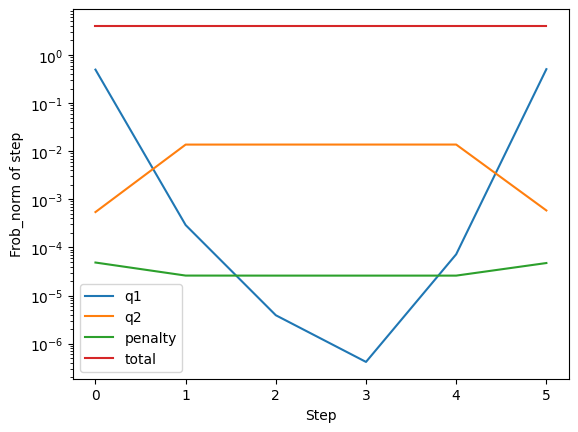

{'Utarget unitarity': 0.0,
 'Vs unitarity': array([0.00000000e+00, 1.42108547e-14, 2.04281037e-14, 1.42108547e-14,
        1.07204187e-14, 1.46549439e-14, 6.10622664e-14]),
 'U_decomp err': array([6.85842959e-15, 1.53476433e-14, 1.62728502e-14, 1.26519623e-14,
        1.08034536e-14, 2.32091708e-14,           -inf]),
 'err': 6.106226635438361e-14,
 'ConjMxCom Herm': 0.0,
 'MxComp compat': 0.0,
 'U2t_0w_proj': 0.0}

In [30]:
from pylab import *
from UnitaryChain import *
from solutionary import *
from numpy import *

dictionary = solutionary()
dictionary.load("tyler_sols.obj")

UC = two_qubits_unitary(np.diag([1.,1.,1.,-1.])) # initialization necessary to avoid bug
UC = dictionary.access(4)
print(UC.Utarget)
print(UC.coef)
print(UC.str(verbose=3))

x = range(UC.N)
y = []

for s in range(UC.N):
    subnorms2 = []
    jlogU = UC.jlogU(s)
    jlogUT = jlogU.conj()
    ##	MxComp_weights2 = [ pe, R1, R1, pe, R1, 2*R2, 2*R2, pe, R1, 2*R2, 2*R2, pe, pe, pe, pe, pe ]
    R1_comps = np.array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    R2_comps = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])
    pe_comps = np.ones(16) - R1_comps - R2_comps
    comps = [ R1_comps, R2_comps, pe_comps ]
    wsum_str = "weight2 = {} = ".format( UC.weight2_at_step(s) )
    mxsum_str = stringtools.joinstr([ "  ", zero_real_if_close(jlogU) ])
    for c in range(3):
        MxComps = (2/np.pi) * np.array([ comps[c][i] * np.sum(UC.ConjMxComp_list[i] * jlogUT) for i in range(16) ]).real
        M = np.tensordot(MxComps, UC.MxComp_list, axes=[[0],[0]]) / 2
        subnorms2.append(Frob_norm(zero_real_if_close(M)))
    subnorms2.append(Frob_norm(UC.U(s)))
    y.append(subnorms2)

y = array(y).transpose()
labels = ["q1", "q2", "penalty", "total"]
for i in range(len(y)):
    plot(x, y[i], label=labels[i])
yscale("log")
legend()
xlabel("Step")
ylabel("Frob_norm of step")
show()
UC.check_consistency()